<a href="https://colab.research.google.com/github/glaserlab/LVM-Workshop/blob/main/nb1_FA_GPs_GPFA_HMMs_sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Some helper functions for Gaussians
from scipy.stats import norm
from numpy.random import normal, multivariate_normal

#Sci-kit linear factor analysis and PCA
from sklearn.decomposition import FactorAnalysis, PCA

#Some other scikit learn models we'll be using
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## Factor Analysis

1) Write code to simulate data from the  factor analysis model with the following parameters, with 1 latent and 3-dimensional observations:  

$W = \begin{bmatrix} -1 \\ 1 \\ 2 \end{bmatrix}$
$\Psi = \begin{bmatrix} 10 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

<br>

*Credit: This problem is inspired from a problem from Jonathan Pillow's Computational Neuroscience course at Princeton*

a) First, generate 2000 samples of 1-dimensional latent $z$

In [2]:
#Set the random seed so we get the same results every time
np.random.seed(1)

#Fill in below
n_samp=2000
Z=normal(0,1,n_samp)[None,:]

In [3]:
#Change below code if necessary, based on the variable name you gave to Z

# Sort samples of Z in order to make visualization of the latent more obvious later on
Z=np.sort(Z)

b) From the latent, generate 3-dimensional samples $x$. <br> Also, create a version, $x_{noiseless}$, that doesn't include the observation noise ($\Psi$).

In [4]:
W=np.array([-1,1,2])[:,None]

X_noiseless=W@Z

Psi=np.diag([10,1,1])

noise=multivariate_normal(np.zeros(3),Psi,n_samp).T

X=X_noiseless+noise

c) Make a scatter plot showing the first two dimensions of $x$ samples.
<br> Overlay the same for $x_{noiseless}$, to get an intuition for how the shared signal and noise differ.
<br> Make the x and y axes have equal limits

(-12.0, 12.0)

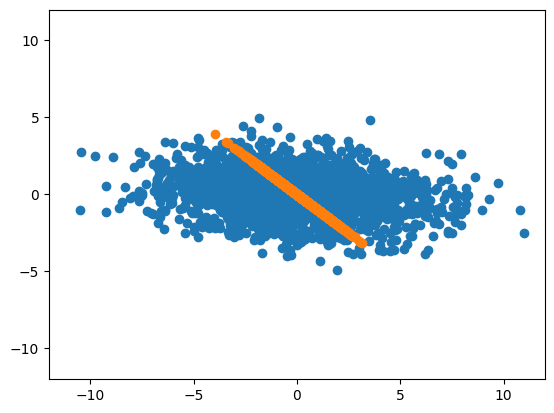

In [5]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(X_noiseless[0,:],X_noiseless[1,:])
plt.ylim([-12,12])
plt.xlim([-12,12])

d) To make this more clearly connected to neuroscience, let's assume each of these samples was taken over the course of 2000 time points. Plot the latent and the first two dimensions of $x$ (the 'activity of two neurons') by filling in the below code

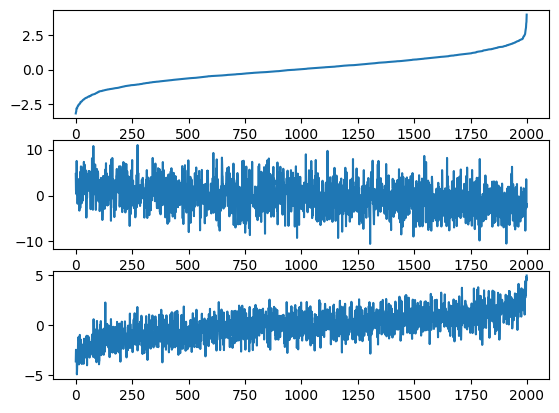

In [6]:
#Plot latent
plt.subplot(3,1,1)
plt.plot(Z[0,:])

#Plot first dimension of x
plt.subplot(3,1,2)
plt.plot(X[0,:])

#Plot second dimension of x
plt.subplot(3,1,3)
plt.plot(X[1,:])

e) Fit a factor analysis model with 1 latent to the data, using sci-kit learn. Note that the package has already been imported

In [7]:
fa=FactorAnalysis(1)
Z_hat_fa=fa.fit_transform(X.T)

f) Print the model's loadings (components_) and noise (noise_variance_) to check that they're approximately the same as the model you generated the data from.

In [8]:
fa.components_

array([[-1.04309334,  0.99986088,  2.00633729]])

In [9]:
fa.noise_variance_

array([9.20776844, 1.03101546, 1.10512067])

g) Fit a PCA model to the data. You can also use sci-kit learn. Print the loadings (components_) to see how this differs from factor analysis

In [10]:
pca=PCA(1)
Z_hat_pca=pca.fit_transform(X.T)
print(pca.components_)

[[ 0.91273322 -0.17648319 -0.36847219]]


h) Replot the scatter plot from (c). Now overlay a line with the FA loading axis and a line with the PCA loading axis (just the first two dimensions of those). Include a legend.

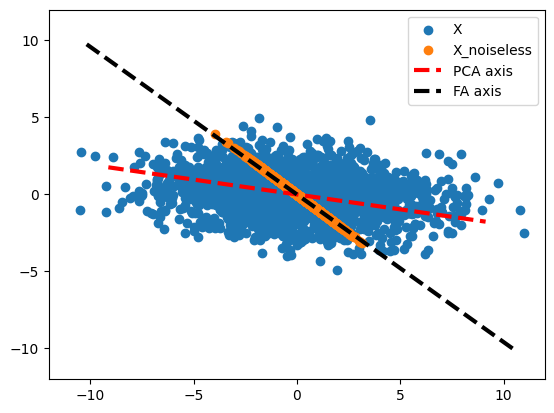

In [11]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(X_noiseless[0,:],X_noiseless[1,:])
plt.plot([-10*pca.components_[0][0],10*pca.components_[0][0]],[-10*pca.components_[0][1],10*pca.components_[0][1]],'r--',linewidth=3)
plt.plot([-10*fa.components_[0][0],10*fa.components_[0][0]],[-10*fa.components_[0][1],10*fa.components_[0][1]],'k--',linewidth=3)

plt.ylim([-12,12])
plt.xlim([-12,12])

plt.legend(['X','X_noiseless','PCA axis','FA axis'])

i) Explain in words, in the cell below, why the loadings for PCA and FA are different

PCA simply models the covariance structure, so when one neuron has much larger variance due to noise, the loading will reflect this noise (the PCA loadings reflect all covariance, whether due to shared signal or independent noise). The FA analysis model is a probabilistic model that includes independent noise for each observation, so it can more accurately model how the individual neurons map onto the underlying latent here.

j) Plot the ground truth latent, and the recovered latent via FA, overlaid

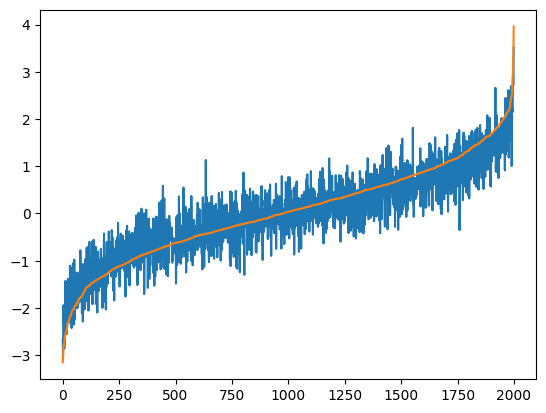

In [12]:
#Plot latent recovered from factor analysis
plt.plot(Z_hat_fa)

#Plot ground truth latent
plt.plot(Z[0,:])

k) Plot the ground truth latent and the recovered latent via PCA, overlaid

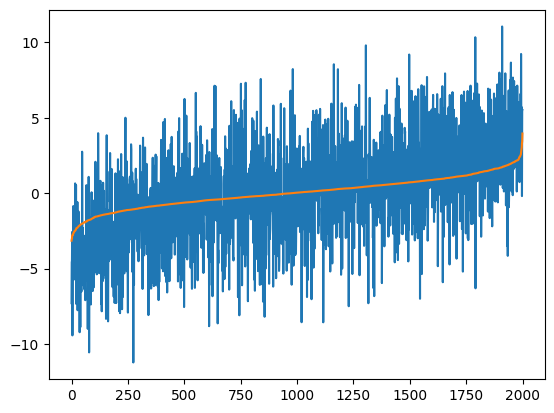

In [13]:
#Plot latent recovered from PCA
plt.plot(-Z_hat_pca)

#Plot ground truth latent
plt.plot(Z[0,:])

L) Explain in words, in the cell below, why PCA's estimate of the latent are so inaccurate relative to FA. In particular, consider which dimensions are being most heavily utilized to estimate the latent.



The PCA loadings strongly use the first neuron (for reasons described in I) - thus, when projecting the neural data into this latent space, this extremely noisy neuron will dominate, resulting in a very noisy latent. On the other hand, when learning the latent, FA will downweight the noisiest neuron (due to the equations used in the next question where $\psi^-1$ is multiplied by X)

m) While you were able to use sci-kit learn for factor analysis rather than fully implementing EM, let's just do the "E" step here using the final model parameters found with sci-kit learn. That is, find p(z|x), using the equation shown in class. You can just find the mean here and not worry about the variance.

In [14]:
psi=np.diag(fa.noise_variance_)
w=fa.components_.T

lam=np.linalg.inv(1+w.T@np.linalg.inv(psi)@w)
zhat=lam@w.T@np.linalg.inv(psi)@X

Create a scatter plot of the latent estimated above, versus the latent directly output from sci-kit learn. If the above calculations were correct, this should be a diagonal line.

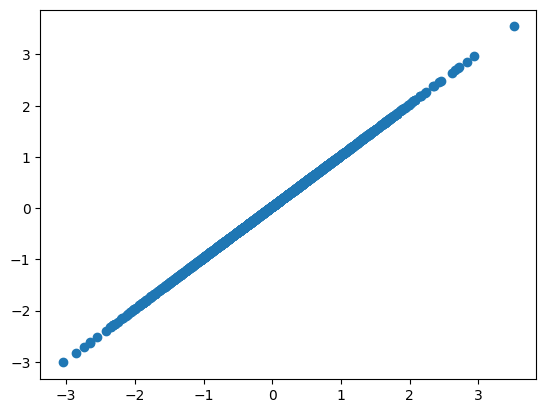

In [15]:
plt.scatter(Z_hat_fa,zhat)

n) The above showed pretty large differences between factor analysis and PCA to demonstrate how they differ, but for most neural datasets, the difference is more minor. <br><br> Re-run the above with FA vs PCA comparison on data generated with the following, less extreme, noise model:
$\Psi = \begin{bmatrix} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$
<br>
Just output the same plot as in (h)

And by re-run, I mean copy-paste your code from a,b,e,g,h (while changing $\Psi$) into your cell below, so you don't overwrite your previous results.

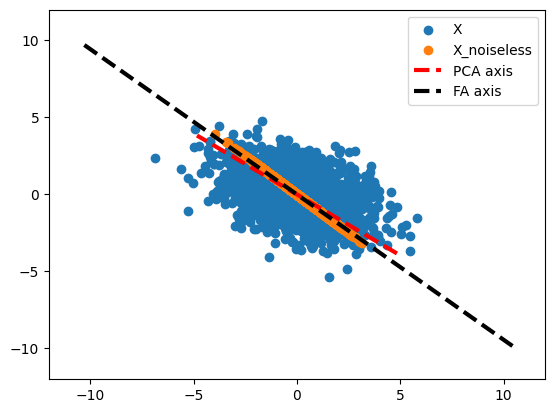

In [16]:
np.random.seed(1)

#Generate data
w=np.array([-1,1,2])[:,None]

X_noiseless=W@Z

Psi=np.diag([2,1,1])

noise=multivariate_normal(np.zeros(3),Psi,n_samp).T

X=X_noiseless+noise


fa=FactorAnalysis(1)
Z_hat=fa.fit_transform(X.T)

#Fit PCA
pca=PCA(1)
pca.fit(X.T)


#Plot
plt.scatter(X[0,:],X[1,:])
plt.scatter(X_noiseless[0,:],X_noiseless[1,:])
plt.plot([-10*pca.components_[0][0],10*pca.components_[0][0]],[-10*pca.components_[0][1],10*pca.components_[0][1]],'r--',linewidth=3)
plt.plot([-10*fa.components_[0][0],10*fa.components_[0][0]],[-10*fa.components_[0][1],10*fa.components_[0][1]],'k--',linewidth=3)

plt.ylim([-12,12])
plt.xlim([-12,12])

plt.legend(['X','X_noiseless','PCA axis','FA axis'])

## 2) Gaussian Processes

I have provided a function for a radial basis function kernel below

In [17]:
#In the below function, x is a vector of datapoints, and L (the lengthscale) is a scalar

def cov_RBF(x,L):
  cov_rbf = np.exp(-(x-x.T)**2/(2*L**2))
  # cov_rbf += 1e-8*np.eye(cov_rbf.shape[0])
  return cov_rbf

a) Let's say our datapoints have values 1,2,...,399,400 (e.g. these are the values of timepoints).  Plot (imshow) the RBF covariance for those values, for lengthscale=100 and lengthscale=1

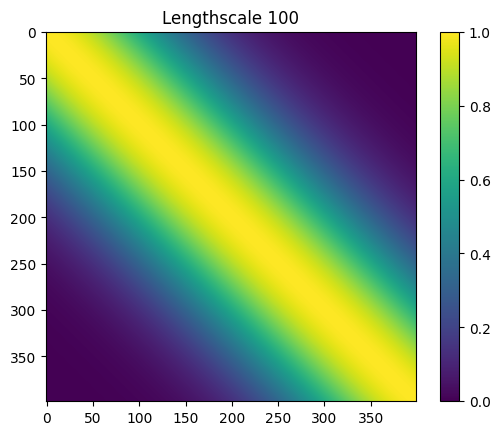

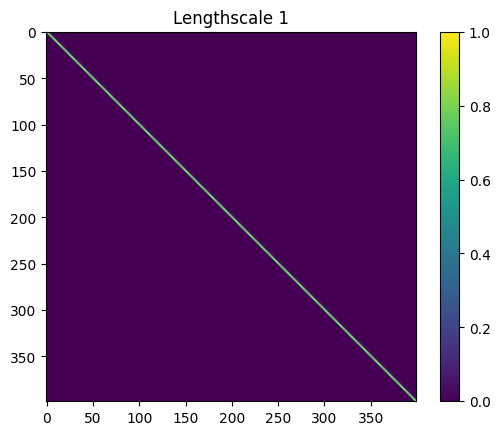

In [18]:
X = np.arange(1,400)[None,:]

scale1=100
K_rbf1 = cov_RBF(X,scale1)
plt.figure()
plt.imshow(K_rbf1,clim=[0,1])
plt.title('Lengthscale 100')
plt.colorbar()

scale2=1
K_rbf2 = cov_RBF(X,scale2)
plt.figure()
plt.imshow(K_rbf2,clim=[0,1])
plt.title('Lengthscale 1')
plt.colorbar()

b) For both of the above RBF covariance functions, sample datapoints from the multivariate normal distribution with mean 0 and those covariances. Plot both of these samples. Note that the result will be 400 datapoints. As a hint, the means that you input into the multivariate_normal function will need to be arrays with 400 zeros.

Text(0.5, 1.0, 'GP Sample for lengthscale=1')

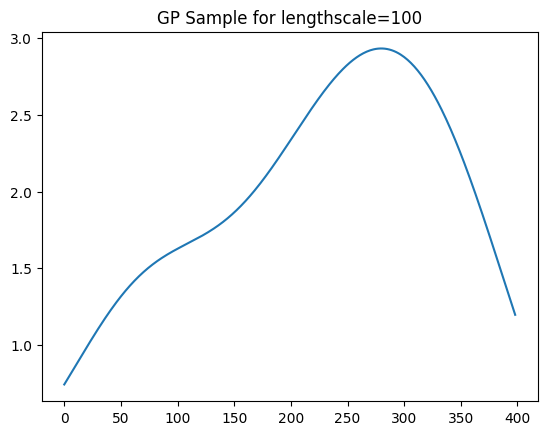

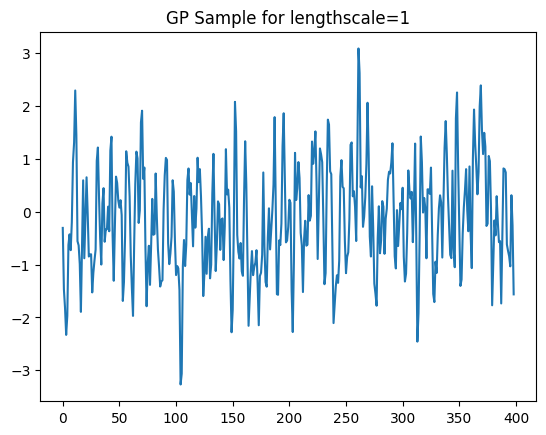

In [19]:
mu=np.zeros(K_rbf1.shape[0])

sample1 = np.random.multivariate_normal(mean=mu, cov=K_rbf1)
plt.figure()
plt.plot(sample1)
plt.title('GP Sample for lengthscale=100')

sample2 = np.random.multivariate_normal(mean=mu, cov=K_rbf2)
plt.figure()
plt.plot(sample2)
plt.title('GP Sample for lengthscale=1')

C) Explain in words how the differences in the covariance functions in (a) (for different scale parameters) explain the differences in the samples from the distributions (b)

A larger lengthscale leads to higher correlations between nearby (and even some not-super-nearby) timepoints in the covariance functions. Higher correlations between nearby timeoints results in smoother distributions over time.

## 3) Gaussian Process Factor Analysis (GPFA)
There are no sections of this portion of the notebook for you to complete. Instead, we will demo how to run Gaussian Process Factor Analysis using the `elephant` package. Run through each cell to generate the plots.

In [20]:
!pip install elephant

In [21]:
### CREDIT: elephant documentation https://elephant.readthedocs.io/en/latest/tutorials/gpfa.html
import numpy as np
import quantities as pq
import neo
from elephant.spike_train_generation import inhomogeneous_poisson_process

def integrated_oscillator(dt, num_steps, x0=0, y0=1, angular_frequency=2*np.pi*1e-3):
    """
    Parameters
    ----------
    dt : float
        Integration time step in ms.
    num_steps : int
        Number of integration steps -> max_time = dt*(num_steps-1).
    x0, y0 : float
        Initial values in three dimensional space.
    angular_frequency : float
        Angular frequency in 1/ms.

    Returns
    -------
    t : (num_steps) np.ndarray
        Array of timepoints
    (2, num_steps) np.ndarray
        Integrated two-dimensional trajectory (x, y, z) of the harmonic oscillator
    """

    assert isinstance(num_steps, int), "num_steps has to be integer"
    t = dt*np.arange(num_steps)
    x = x0*np.cos(angular_frequency*t) + y0*np.sin(angular_frequency*t)
    y = -x0*np.sin(angular_frequency*t) + y0*np.cos(angular_frequency*t)
    return t, np.array((x, y))

def random_projection(data, embedding_dimension, loc=0, scale=None):
    """
    Parameters
    ----------
    data : np.ndarray
        Data to embed, shape=(M, N)
    embedding_dimension : int
        Embedding dimension, dimensionality of the space to project to.
    loc : float or array_like of floats
        Mean (“centre”) of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or “width”) of the distribution.

    Returns
    -------
    np.ndarray
       Random (normal) projection of input data, shape=(dim, N)

    See Also
    --------
    np.random.normal()

    """
    if scale is None:
        scale = 1 / np.sqrt(data.shape[0])
    projection_matrix = np.random.normal(loc, scale, (embedding_dimension, data.shape[0]))
    return np.dot(projection_matrix, data)


def generate_spiketrains(instantaneous_rates, num_trials, timestep):
    """
    Parameters
    ----------
    instantaneous_rates : np.ndarray
        Array containing time series.
    timestep :
        Sample period.
    num_steps : int
        Number of timesteps -> max_time = timestep*(num_steps-1).

    Returns
    -------
    spiketrains : list of neo.SpikeTrains
        List containing spiketrains of inhomogeneous Poisson
        processes based on given instantaneous rates.

    """

    spiketrains = []
    for _ in range(num_trials):
        spiketrains_per_trial = []
        for inst_rate in instantaneous_rates:
            anasig_inst_rate = neo.AnalogSignal(inst_rate, sampling_rate=1/timestep, units=pq.Hz)
            spiketrains_per_trial.append(inhomogeneous_poisson_process(anasig_inst_rate))
        spiketrains.append(spiketrains_per_trial)

    return spiketrains

### Simulation parameters for generating ground-truth latents

In [22]:
### Parameters for oscillator used to generate ground-truth latents
timestep = 1 * pq.ms        # Each timestep is 1 ms
trial_duration = 2 * pq.s   # Trial duration is 2 ms
num_steps = int((trial_duration.rescale('ms')/timestep).magnitude) # Total number of steps is 2000

# specify data size
num_trials = 20
num_spiketrains = 50 # This is how many "neurons" we're inputting to GPFA

### Generate the ground-truth latents and visualize

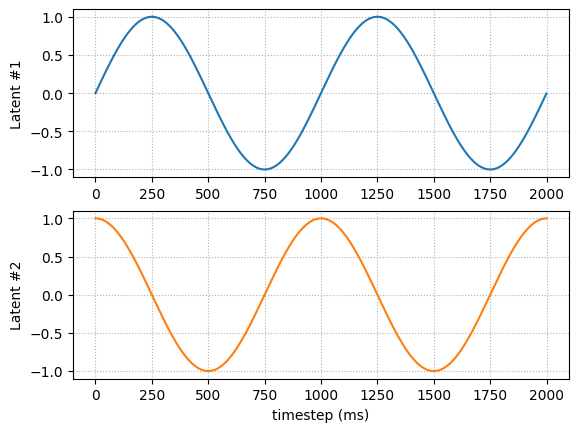

In [23]:
import matplotlib.pyplot as plt
# generate a low-dimensional trajectory
times_oscillator, oscillator_trajectory_2dim = integrated_oscillator(
    timestep.magnitude,
    num_steps=num_steps,
    x0=0,
    y0=1
)
plt.subplot(2,1,1)
plt.plot(oscillator_trajectory_2dim[0,:])
plt.grid(ls=":")
plt.ylabel("Latent #1")
plt.subplot(2,1,2)
plt.plot(oscillator_trajectory_2dim[1,:], c='C1')
plt.xlabel("timestep (ms)"), plt.ylabel("Latent #2")
plt.grid(ls=":")

### Generate high-dimensional "neural" trajectory

In [24]:
# Let's set the average firing rate pretty high for the sake of simulation
avg_fr = 50

# random projection to high-dimensional space - resulting shape is neurons x timesteps
oscillator_trajectory_Ndim = random_projection(
    oscillator_trajectory_2dim,
    embedding_dimension=num_spiketrains
)

# Normalize to instaneous rate
normed_traj = oscillator_trajectory_Ndim / oscillator_trajectory_Ndim.max()

# generate spike trains
spiketrains_oscillator = generate_spiketrains(
    (normed_traj-normed_traj.min()) * avg_fr,
    num_trials,
    timestep
)

In [25]:
print(type(spiketrains_oscillator))

<class 'list'>


### Note on formatting inputs for GPFA
* This is important if you're interested in running GPFA on your own data.
* List of trials, where each trial is a list with the following format:
    [`neo.SpikeTrain` for neuron #1, ...]
* Length of outer list should be `num_trials`, length of inner list should be `num_neurons`
* Use `neo.SpikeTrain(times=[3, 4, 5], units='sec', t_stop=10.0)`, replacing times with your spike times to make the proper conversion for `neo`.
* Check types on `spiketrains_oscillator` ^ for an example

### Now fit GPFA

In [26]:
from elephant.gpfa import GPFA
gpfa_2dim = GPFA(bin_size=10*pq.ms, x_dim=2)


### Input must be a list of trials, where each trial is a list of neo.SpikeTrains objects
gpfa_2dim.fit(spiketrains_oscillator) # Input must be a neo.SpikeTrains object

Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(10.) * ms, x_dim=2)

### Infer the latents for GPFA
We will visualize the inferred latents from GPFA alongside latents inferred using pre-smoothing and factor analysis below.

In [27]:
trajectories = gpfa_2dim.transform(spiketrains_oscillator)

## Convert spike times to binned spike trains
* We are going to bin our spikes at 10 ms and apply a fixed level of pre-smoothing for each latent dimension.
* Note that the $\sigma$ for the Gaussian kernel used for pre-smoothing will be in `bins` not ms.

In [28]:
from elephant.conversion import BinnedSpikeTrain

# For fitting factor analysis, let's convert SpikeTrains to binned spike trains
X = [BinnedSpikeTrain(s, bin_size=10*pq.ms).to_array().T for s in spiketrains_oscillator]

### Let's apply some pre-smoothing before applying factor analysis

In [29]:
from scipy.ndimage import gaussian_filter1d

X_sm = [gaussian_filter1d(x.astype('float32'), sigma=2.5, axis=0) for x in X]

### Now let's apply factor analysis and compare results with ground-truth and GPFA

(-2.0, 2.0)

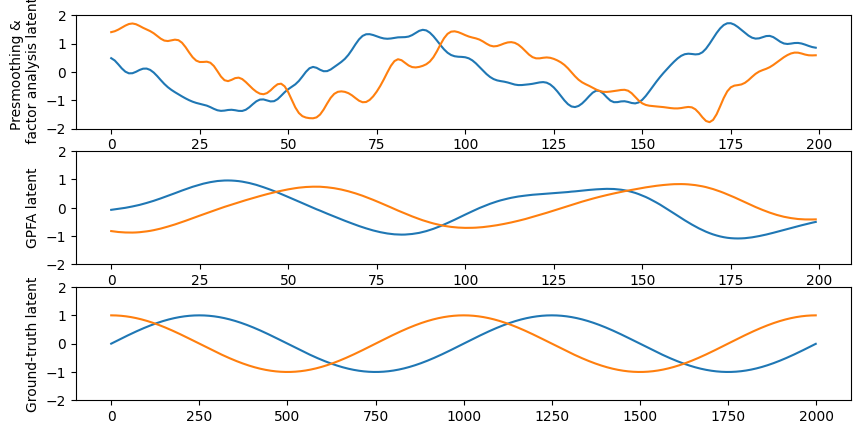

In [30]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2).fit(np.concatenate(X_sm, axis=0))
latents_fa = [fa.transform(x) for x in X_sm]

fig, axs = plt.subplots(3, 1, figsize=(10,5))

# Plot the latents extracted using presmoothing + factor analysis
axs[0].plot(latents_fa[0][:,0])
axs[0].plot(latents_fa[0][:,1])
axs[0].set_ylabel("Presmoothing & \n factor analysis latent")
axs[0].set_ylim(-2,2)

# Plot the latents extracted using GPFA (learned-smoothing)
axs[1].plot(trajectories[0].T[:,0])
axs[1].plot(trajectories[0].T[:,1])
axs[1].set_ylabel("GPFA latent")
axs[1].set_ylim(-2,2)

# Plot the ground-truth latents
axs[2].plot(oscillator_trajectory_2dim[0,:])
axs[2].plot(oscillator_trajectory_2dim[1,:])
axs[2].set_ylabel("Ground-truth latent")
axs[2].set_ylim(-2,2)


# Hidden Markov Models


A) Write code to simulate data from the an HMM with 2 discrete states (indexed by 0 and 1), with 1-dimensional Gaussian observations.
<br><br>
The initial state probabilities are:<br>
$P(z_0=0)=0.5$,
$P(z_0=1)=0.5$
<br><br>
The transitions matrix is:<br>
$A = \begin{bmatrix} 0.9 & 0.1 \\ 0.05 & 0.95 \end{bmatrix}$
<br><br>
The emissions probabilities are:<br>
$P(y|z=0)=N(0,1)$
<br>
$P(y|z=1)=N(2,1)$

<br><br>
We've provided code below that you can fill in (which should hopefully make this faster for you)

*Credit: Note that the below code has been adapted from Neuromatch's HMM exercise.*

In [31]:
#Initial probabilities
initial_probs=[0.5,0.5]

#Transition matrix
transition_matrix=np.array([[0.9,0.1],[0.05,0.95]])

#Means for the 2 states
means=[0,2]

#Variances for the 2 states
vars=[1,1]

#Number of time points to run the simulation for
T=500

#We'll set the random seed so results are reproducible
np.random.seed(0)

# Initialize the latent (Z) and observation (X)
Z = np.zeros((T,),dtype=int)
X = np.zeros((T,))

# Sample initial (time 0) latent state
Z[0] = np.random.choice([0,1],p=initial_probs)

# Given the latent that was just sampled, determine the observation at time 0
X[0] = normal(means[Z[0]],vars[Z[0]])

# Loop over time points
# At each time point, sample the next latent state (based on the transition matrix and the previous state),
# and then determine the observation at that time point
for t in range(1,T):

  # Determine latent state at time `t`
  transition_vector = transition_matrix[Z[t-1],:]
  Z[t] = np.random.choice([0,1],p=transition_vector)

  #Given the latent that was just sampled, determine the observation at time t
  X[t] = normal(means[Z[t]],vars[Z[t]])

Run the code below to plot the latent (Z) and the observations (X)

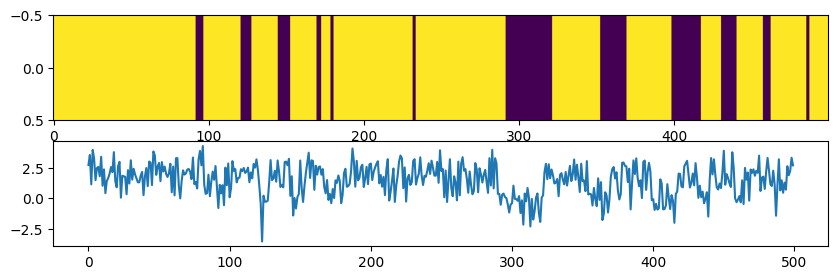

In [32]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.imshow(Z[None,:],aspect='auto')

plt.subplot(2,1,2)
plt.plot(X)

B) Fit K-means to the observations. You can use sci-kit learn (imported above)

In [33]:
km=KMeans(2)
Z_kmeans=km.fit_predict(X[:,None])

Run the below code to see how the states learned compare to the ground truth HMM states. Change "Z_kmeans" to the variable name of the kmeans states you used above.

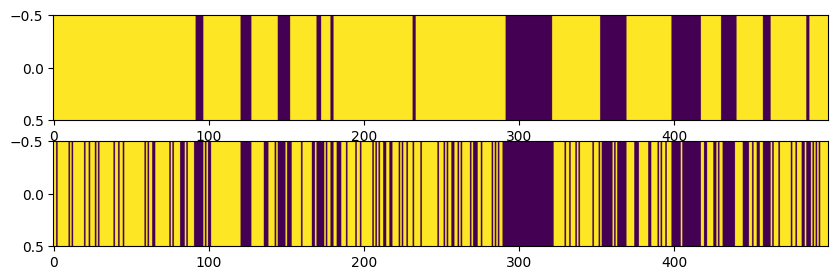

In [34]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.imshow(Z[None,:],aspect='auto')

plt.subplot(2,1,2)
plt.imshow(Z_kmeans[None,:],aspect='auto')

C)Calculate the accuracy of K-means at finding the ground truth HMM states

In [35]:
#Accuracy
np.mean(Z==Z_kmeans)

0.772

D) We are not going to have you code up the full EM algorithm, below is a didactic implementation of it you should run through to get a better understanding of the optimization.

The first part will find the $\alpha$s for all time points.

In [36]:
## Forward algorithm
K=2

alphas=np.zeros((T,K))

t=0

emission_probs=np.zeros(K)
for k in range(K):
  emission_probs[k]=norm.pdf(X[t],means[k],vars[k])

alphas_tmp=np.array(initial_probs)*emission_probs
alphas[t,:]=alphas_tmp/np.sum(alphas_tmp)

for t in range(1,T):
  emission_probs=np.zeros(K)
  for k in range(K):
    emission_probs[k]=norm.pdf(X[t],means[k],vars[k])

  alphas_tmp=(transition_matrix.T@alphas[t-1])*emission_probs
  alphas[t,:]=alphas_tmp/np.sum(alphas_tmp)

Run the below code to see how the alphas compare to the ground truth HMM states. Change "alphas" to the variable name you used above. This is a good sanity check that the above code is correct, since the alphas for one of the states will look somewhat similar to the ground truth (although the values won't always be exactly 0 and 1).

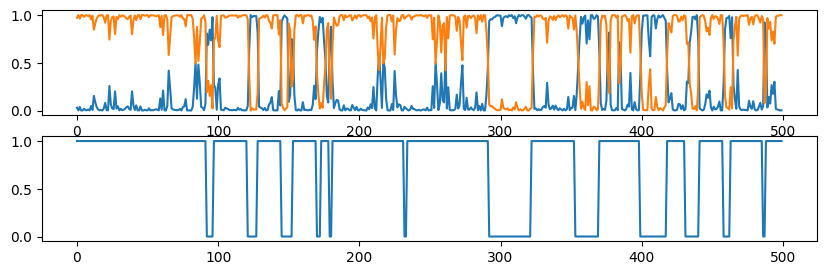

In [37]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(alphas)

plt.subplot(2,1,2)
plt.plot(Z)

E) Below is an implementation of the backward algorithm for HMMs. Use it to calculate "betas" for all time points.

In [38]:
## Backward algorithm
K=2

betas=np.zeros((T,K))

t=T-1

betas_tmp=np.array([1,1])
betas[t,:]=betas_tmp/np.sum(betas_tmp)

for t in range(T-2,-1,-1):
  emission_probs=np.zeros(K)
  for k in range(K):
    emission_probs[k]=norm.pdf(X[t+1],means[k],vars[k])

  betas_tmp=transition_matrix@(betas[t+1]*emission_probs)

  betas[t,:]=betas_tmp/np.sum(betas_tmp)

Run the below code to see how the betas compare to the ground truth HMM states. This is a good sanity check that the above code is correct, since the betas for one of the states will look somewhat similar to the ground truth (although the values won't always be exactly 0 and 1).

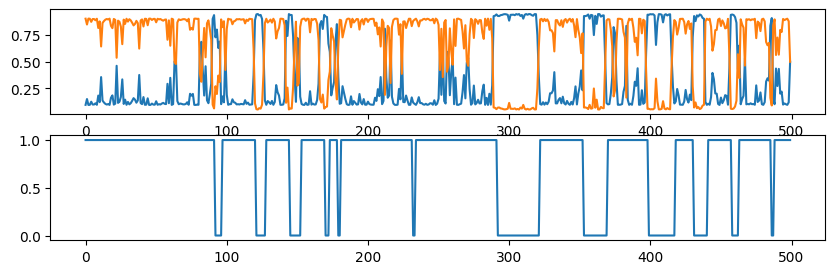

In [39]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(betas)

plt.subplot(2,1,2)
plt.plot(Z)

F) Run the forward/backward algorithm (combining the steps above) to get the posterior, p(z|x).

In [40]:
#Combine forward/backward to  get posterior

posterior=np.zeros((T,K))
for t in range(T):

  posterior_tmp=alphas[t]*betas[t]

  posterior[t]=posterior_tmp/np.sum(posterior_tmp)

Run the below code to see how the posterior compares to the ground truth HMM states. Change "posterior" to the variable name you used above.

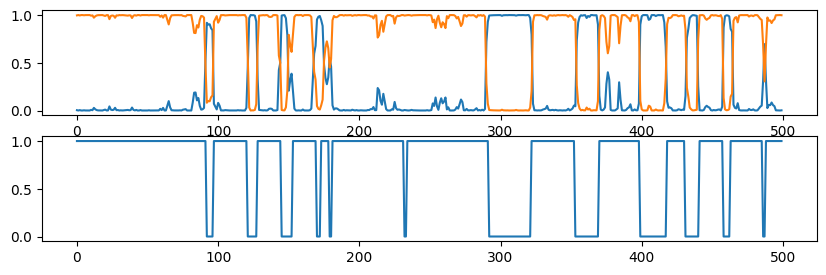

In [41]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(posterior)

plt.subplot(2,1,2)
plt.plot(Z)

G) Calculate the accuracy of the posterior at estimating the ground truth latent states. Set a probability threshold of 0.5 to determine which of the two states is more likely.

In [42]:
Z_fb=posterior[:,0]<=0.5
np.mean(Z_fb==Z)

0.956

H) In words, in the text box below, describe why the HMM led to more accurate results than fitting with K-means.

As a side note, this increase in accuracy is not just because we were cheating above and using the ground truth parameters. Fitting an HMM with EM gives similar results.

Unlike kmeans, HMMs model the temporal transition between states. Thus, when there is temporal continuity in the ground truth states - i.e. which state you are at time t depends on the state at t-1  - an HMM will generally give more accurate results.

### Some final notes
There are more advanced versions of HMMs, where in addition to time-varying disecrete latent states, you have state-dependent model parameters. One example is the GLM-HMM, where each discrete state additionally corresponds to a set of weights on a generalized linear model.

Link to [GLM-HMM tutorial](https://github.com/zashwood/ssm/blob/master/notebooks/2b%20Input%20Driven%20Observations%20(GLM-HMM).ipynb)